## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#Changing the Columns Names
data = data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'})
data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [6]:
#Finding unique values of each column
column_lengths = len(data.columns)
unique_values= dict()
col_values=list()
for j in range(column_lengths):
    col_values.append(data[data.columns[j]])
    
for i in range(column_lengths):
    values=col_values[i]
    unique_values["Unique Values in Column {}:".format(i)] = values.unique()

In [7]:
unique_values

{'Unique Values in Column 0:': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172

In [8]:
#Checking for Null Values
data.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [9]:
#Checking for Nan Values
data.isna().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [10]:
#Dropping Empty Columns
#CustomerID is not of much importance for the clustering hence we drop it
data = data.drop('CustomerID', axis=1)
data

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Data Visualisation

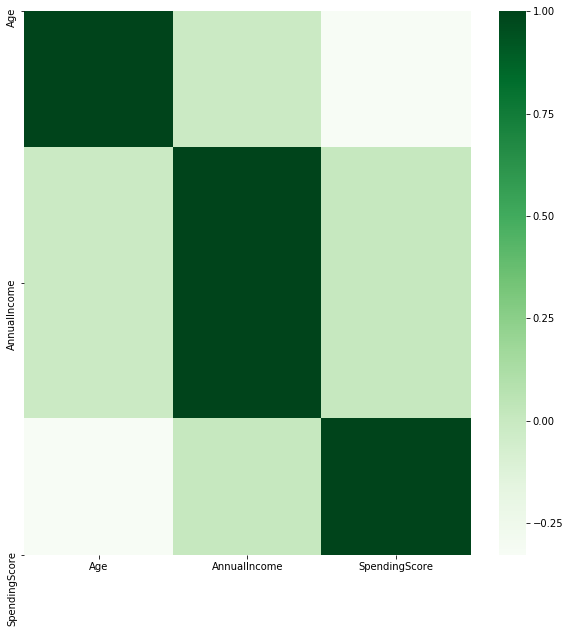

In [11]:
y=data.drop(data.columns[[0]],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(y.corr(),cmap="Greens")
plt.show();

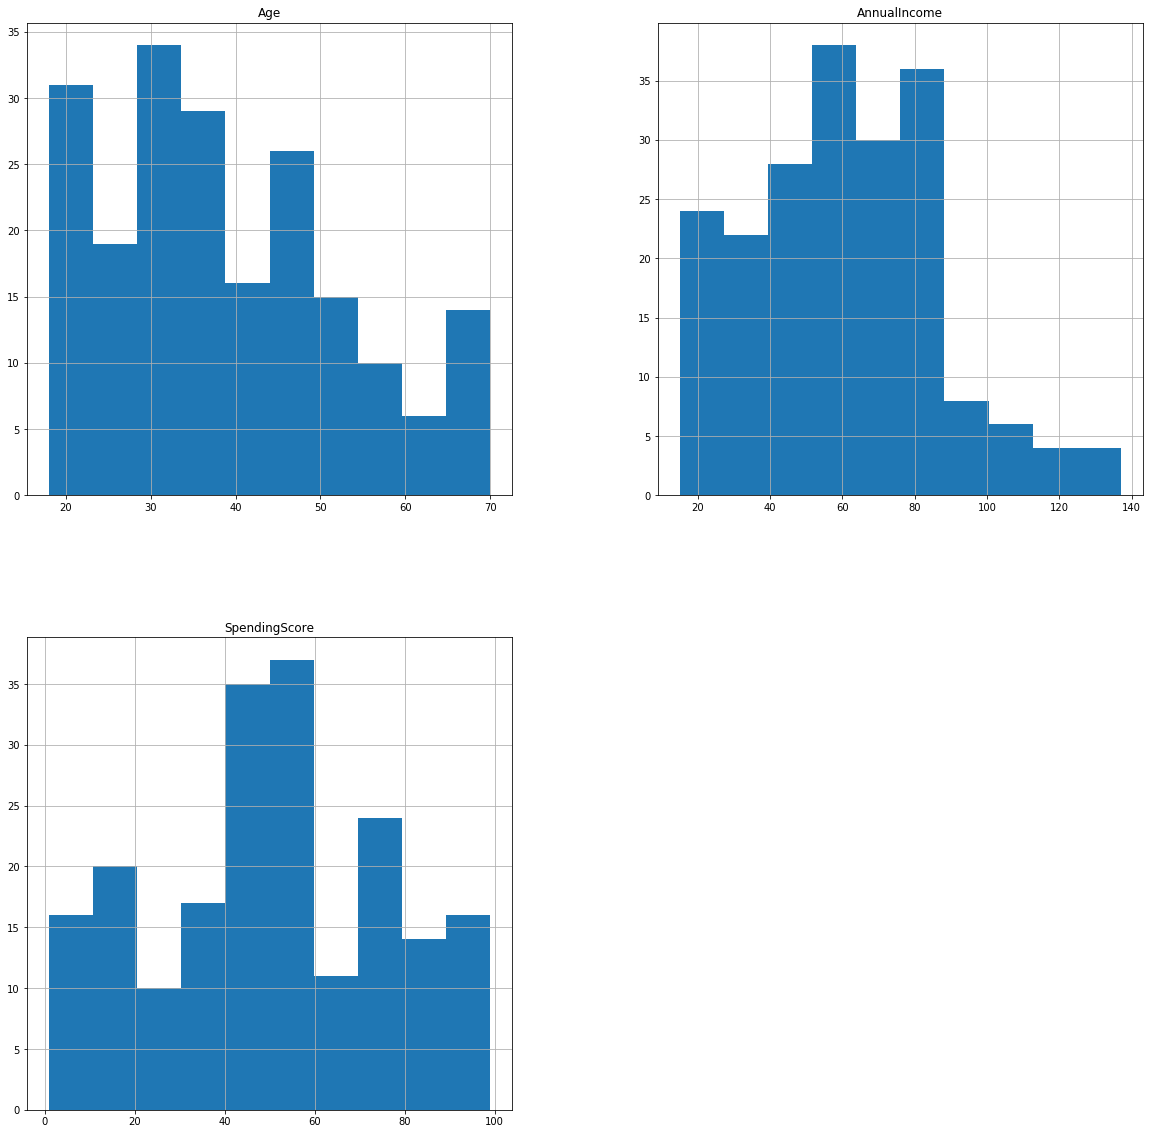

In [12]:
#Histogram of all the columns to understand the distribution
data.hist(figsize=(20,20));

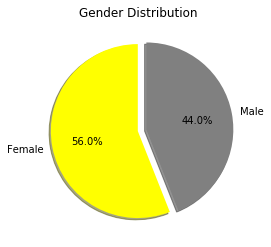

In [13]:
#PieChart to show Gender Distribution
size=data['Gender'].value_counts()
colors=['yellow','gray']
plt.pie(size,
        labels=['Female','Male'],
        colors=colors,     # colors
        startangle=90,     #start angle at 90%
        shadow= True,      # shadows present
        explode=(0,0.1),     # one slide exploded
        autopct='%1.1f%%') # percent listed as a fraction

plt.title('Gender Distribution')
plt.show()

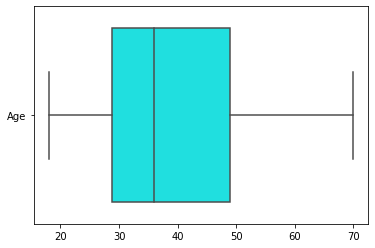

In [14]:
#Boxplot to show Age Distribution
sns.boxplot(data=data[['Age']], 
            orient="h", 
            color="aqua")

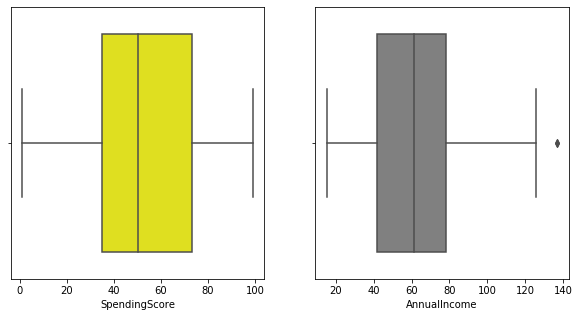

In [15]:
#Boxplot to show distribution of
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data["SpendingScore"], color="yellow")
plt.subplot(1,2,2)
sns.boxplot(data["AnnualIncome"], color="gray")
plt.show()

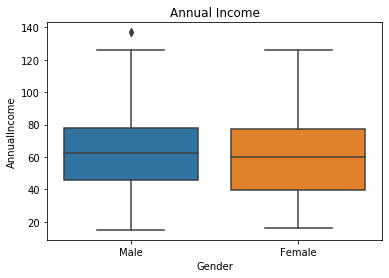

In [16]:
male_annualicome = data[data['Gender']=='Male']['AnnualIncome'] # subset with males income
female_annualincome = data[data['Gender']=='Female']['AnnualIncome'] # subset with females income
bins = range(10,100,10)
# boxplot
sns.boxplot(x='Gender', y='AnnualIncome', data=data)
plt.title('Annual Income')
plt.show()

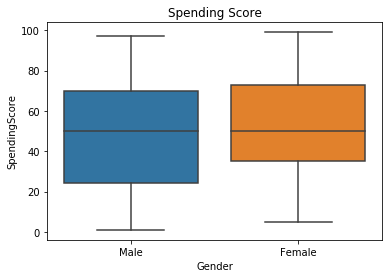

In [17]:
male_spendingscore = data[data['Gender']=='Male']['SpendingScore'] # subset with males income
female_spendingscore = data[data['Gender']=='Female']['SpendingScore'] # subset with females income
bins = range(10,100,10)
# boxplot
sns.boxplot(x='Gender', y='SpendingScore', data=data)
plt.title('Spending Score')
plt.show()

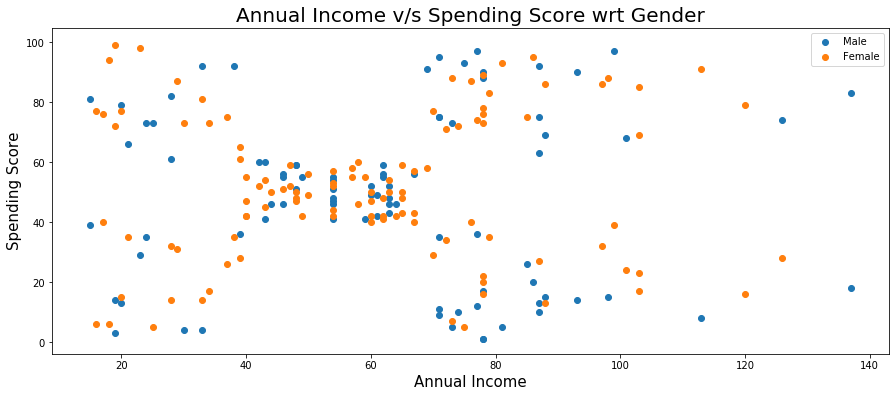

In [18]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x='AnnualIncome', y='SpendingScore', data = data[data['Gender'] == gender], label=gender)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Spending Score', fontsize=15)
plt.title('Annual Income v/s Spending Score wrt Gender',fontsize=20)
plt.legend()
plt.show()

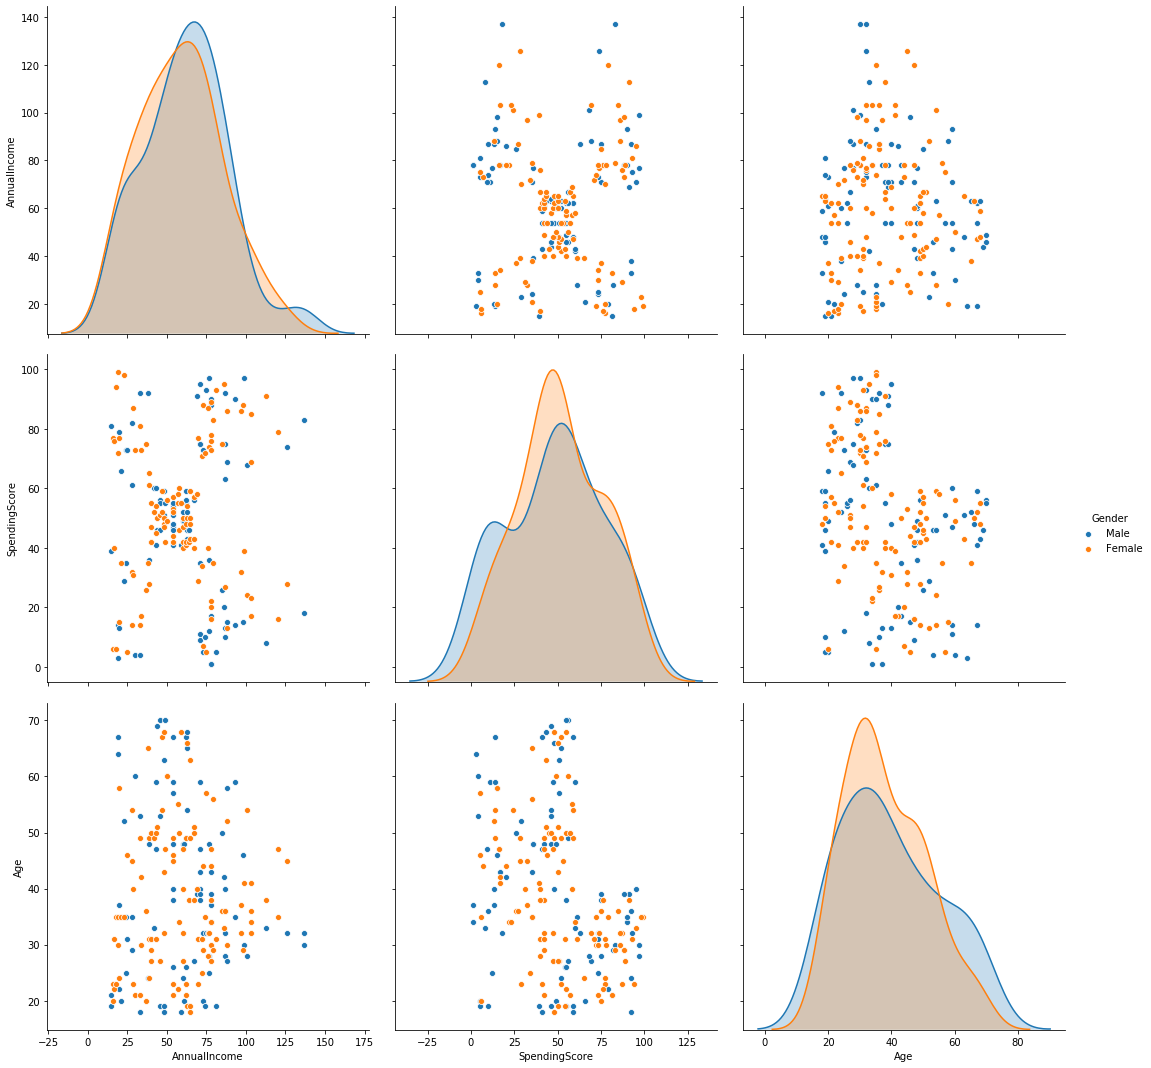

In [19]:
sns.pairplot(vars=["AnnualIncome","SpendingScore","Age"], data=data, hue="Gender", size=5)

## KMeans Clustering

In [20]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [21]:
from sklearn.cluster import KMeans
clus= data.iloc[:, [2,3]].values


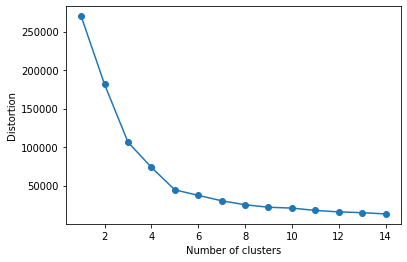

In [22]:
distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        random_state=0
    )
    y=km.fit(clus)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

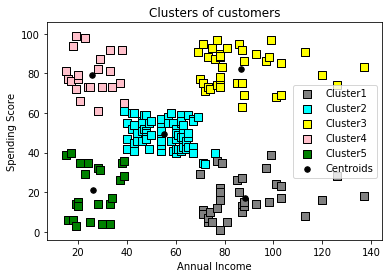

In [23]:
km = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y= km.fit_predict(clus)
plt.scatter(
    clus[y== 0, 0], clus[y == 0, 1],
    s=50, c='gray',
    marker='s', edgecolor='black',
    label='Cluster1')
plt.scatter(
    clus[y== 1, 0], clus[y == 1, 1],
    s=50, c='aqua',
    marker='s', edgecolor='black',
    label='Cluster2')
plt.scatter(
    clus[y== 2, 0], clus[y == 2, 1],
    s=50, c='yellow',
    marker='s', edgecolor='black',
    label='Cluster3')
plt.scatter(
    clus[y== 3, 0], clus[y == 3, 1],
    s=50, c='pink',
    marker='s', edgecolor='black',
    label='Cluster4')
plt.scatter(
    clus[y== 4, 0], clus[y == 4, 1],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='Cluster5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

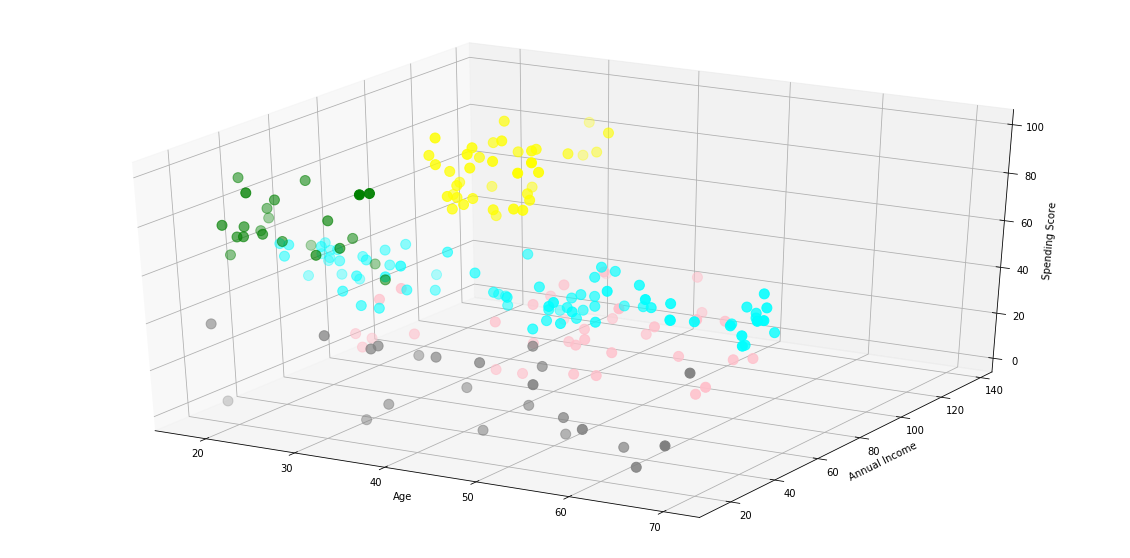

In [24]:
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=5)
y = km.fit_predict(data)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[y == 0],
           data["AnnualIncome"][y == 0], 
           data["SpendingScore"][y == 0], 
           c='gray', s=100)
ax.scatter(data.Age[y == 1],
           data["AnnualIncome"][y == 1],
           data["SpendingScore"][y == 1],
           c='aqua', s=100)
ax.scatter(data.Age[y == 2],
           data["AnnualIncome"][y == 2],
           data["SpendingScore"][y == 2],
           c='yellow', s=100)
ax.scatter(data.Age[y == 3],
           data["AnnualIncome"][y == 3],
           data["SpendingScore"][y == 3],
           c='pink', s=100)
ax.scatter(data.Age[y == 4],
           data["AnnualIncome"][y == 4],
           data["SpendingScore"][y == 4],
           c='green', s=100)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


In [27]:
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 0.25.1
numpy version: 1.16.5
seaborn version: 0.9.0
